In [ ]:
#| hide
from point_cloud.core import *

# point_cloud

> Module to create a new set of *C* vectors directed outwards from a cloud of *A* and *B* points

Given a list of 3D points, where each point has an *A* or *B* label, this module defines a set of functions to calculate new points labeled *C*, at a fixed distance from each point *B*, and directed outside the input point cloud. Specifically, first the input point cloud centroid is calculated. Then, for each *B* point, a new *C* point is determined, following a prescribed distance D from the point *B*, along the direction centroid -> *B*.

## Usage

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. 

[repo]: https://github.com/valentina-lacivita/ses_cloud
[docs]: https://valentina-lacivita.github.io/ses_cloud/

### Run the module on provided input data using Docker

We have defined a minimalist Docker wrapper that installs this package, runs it on the input data, and export the results. After cloning this repo, go to the `docker` directory run the command:

```sh
docker compose up --build
```

The files with the output points data and related plot will be exported to the `data` directory.

### Extra: beyond Docker / module installation via pip

Install latest from the GitHub [repository][repo]:

```sh
pip install git+https://github.com/valentina-lacivita/ses_cloud.git
```

[repo]: https://github.com/valentina-lacivita/ses_cloud
[docs]: https://valentina-lacivita.github.io/ses_cloud/

#### Example: running C-points calculation on provided input data

The following command reads the input file containg the labeled *A* and *B* points, calculates the *C* points and save them in a file on the same directory (please update the file path accordingly):

In [ ]:
input_data = "../data/cdd.txt"
output_result = "../data/result_C_points.txt"
calculate_C_points(input_data, output_result)

Loading input data from '../data/cdd.txt'...
Calculate points...
Saving result data to '../data/result_C_points.txt'...
Done.


Using optional parameters, one can also plot the point cloud along with the new *C* vectors by including also a filename for the plot image and specify a prescribed distance between the points *B* and *C*:

Loading input data from '../data/cdd.txt'...
Calculate points...
Saving result data to '../data/result_C_points.txt'...
Exporting plots to '../data/result_plot.png'...
Done.


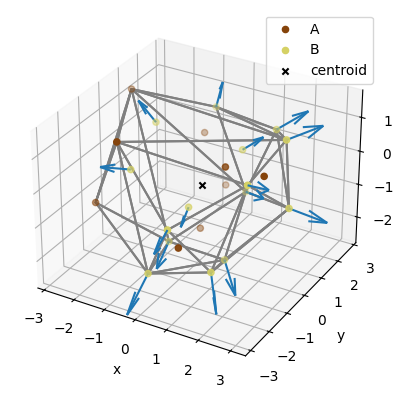

In [ ]:
output_plot = "../data/result_plot.png"
calculate_C_points(input_data, output_result, output_plot_file=output_plot, distance=1.0)

## Development

> For the thought process behind the code, please follow the [core notebook].

> To browse the module code itself, please check out [core.py] and the [core documentation].

Given the characteristics of the problem, the emphasis in documentation quality and time constraints, we have chosen to leverage [nbdev] to write, test, document, and distribute software package.

[core notebook]: https://github.com/valentina-lacivita/ses_cloud/blob/main/nbs/00_core.ipynb
[core.py]: https://github.com/valentina-lacivita/ses_cloud/blob/main/ses_cloud/core.py
[core documentation]: https://valentina-lacivita.github.io/ses_cloud/core.html
[nbdev]: https://nbdev.fast.ai/

### Contributing

#### 1. Setup the dev environment

First checkout the repository and run with [uv]:

```shell
uv run nbdev_install_quarto
```
And

```shell
uv run nbdev_install_hooks
```

[uv]: https://github.com/astral-sh/uv

#### 2. Enable the new kernel for the Jupyter notebook

Run in the project folder:

```shell
uv run ipython kernel install --user --name=point_cloud
```

Launch jupyter lab to to open the notebooks:

```shell
uv run jupyter lab
```

In the notebook one can select the correct kernel with the option: Kernel -> Change Kernel.


#### 3. Add/change code

To add/change code, update jupyter notebooks in `nbs` accordingly. Before committing the changes inside open the virtual environment created in the project root folder:

```shell
source .venv/bin/activate
```

Then run the `git commit` inside the virtual environment such that pre-commit hooks can be run and update the module code automatically. These hooks clean the notebooks to get rid of extreanous output for git and build the .py modules from Jupyter notebooks.

The next step is to install the package

```shell
pip install -e '.[dev]'
```

Also consider running inside the virtual environment
* `nbdev_test` to test the code
* `nbdev_readme` to update the repo's `README.md` file from the index notebook.

When code is pushed to Github, it will trigger a CI workflow that runs tests. When code is merged to `main` will trigger another workflow to update the package documentation on Github pages.
